In [1]:
#Problem statement: As given in mail
#Credit.csv provides information about credit status of customers of a bank. Customers, on the basis of demographic characteristics, have been categorised into ‘good’ and ‘bad’. Build an algorithm to predict customers’ viability in terms of the given categories.
#Refer to credit.csv dataset and do exploratory data analysis to find out:
#a>	The relationship between the target variable and other independent variables
#b>	Check for and solve ( if and when required) missing value and outlier related issues

#At the end, ideally, you should be able to figure out who are good and who are bad customers and suggest meaningful and feasible strategies to increase the bank’s revenue.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("Credit.csv",sep=",")
df.head()

C:\Users\SHIBU\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0,Good


In [4]:
#EDA

In [5]:
df.shape

(150002, 18)

In [6]:
df.tail(3)
#Last 2 Rows need to be removed 

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
149999,0.0,0.850283,64.0,Male,North,8158.0,Ownhouse,Self_Emp,Professional,0.0,0.249908,8158.0,8.0,0.0,2.0,0.0,0,Good
150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good,NaN
150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad,NaN


In [7]:
df["Good_Bad"].value_counts(dropna=False)
#Highly Imbalanced data need to be tackled

Good    139974
Bad      10026
NaN          2
Name: Good_Bad, dtype: int64

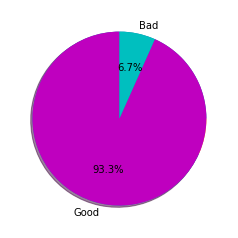

In [8]:
plt.pie(df["Good_Bad"].value_counts())

#piechart

slices=df["Good_Bad"].value_counts()
names=["Good","Bad"]
cols=["m","c"]

plt.pie(slices,labels=names,colors=cols,startangle=90,shadow=True,autopct="%1.1f%%")

plt.show()



In [9]:
numeric_features = df.select_dtypes(include=[np.number])
categorical_features = df.select_dtypes(include=[np.object])

print('Numeric Features:\n', numeric_features.columns)
print('Categorical Features:\n', categorical_features.columns)

Numeric Features:
 Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'MonthlyIncome', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome.1', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse'],
      dtype='object')
Categorical Features:
 Index(['Gender', 'Region', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfDependents', 'Good_Bad'],
      dtype='object')


In [10]:
#exploring the Numerical catogories/features
#Transpose summary statistics for better view
summary_stats = pd.DataFrame(df.describe())
summary_stats = summary_stats.T
print(summary_stats.shape)
summary_stats

(11, 8)


,count,mean,std,min,25%,50%,75%,max
NPA Status,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome.1,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


In [11]:
#As mentioned in data dictionary
#NPA Status: Non performing asset status ( not required as good_bad gives the same information)
#RevolvingUtilizationOfUnsecuredLines: utilization of unsecured loans, ideally should have a value less than 1.
#NumberOfTime30-59DaysPastDueNotWorse: number of times loans were not repaid beyond this timeline
#Debt ratio: total debt/total assets; in most case should be less than 1.


In [12]:
# As mentioned above NPA Status need to be removed
#'Good_Bad' being the target variable need to be made to binary
# numerical data need to be checked for missing values or outliers
# catogorical features need to be inspected to check if dummies creation is suitable or need to be bucketed to avoid large number 
#of dummies
# after creating dummies of all catogorical variable we need to delete one dummy from each catogory to avoid dummy traps
# its an unbalanced data which we can do oversampling or undersampling based on requirement
# logistic regression need to be performed as its a classification problem 
# Model's accuracy need to be checked with different parameters

In [13]:
#lets change target variable to binary
Target = []
for x in df["Good_Bad"]:
    if x=="Good": 
        Target.append(1) 
    else: 
        Target.append(0)      
df["Target"] = Target 

In [14]:
df.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad,Target
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2,Bad,0
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1,Good,1
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0,Good,1
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0,Good,1
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0,Good,1


In [15]:
#lets drop the Good_bad column , as we have Target as thee new column
#lets drop tthe NPA status as mentioned in data dictionary not required as good_bad gives the same information
#lets drop the MonthlyIncome.1 column as its a duplicate column

In [16]:
df1=df.drop(["MonthlyIncome.1","NPA Status","Good_Bad"],axis=1)
df1.head()

,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Target
0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,13.0,0.0,6.0,0.0,2,0
1,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,4.0,0.0,0.0,0.0,1,1
2,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,2.0,1.0,0.0,0.0,0,1
3,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,5.0,0.0,0.0,0.0,0,1
4,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,7.0,0.0,1.0,0.0,0,1


In [17]:
#EDA need to b done for both catogorical and numerical features
#lets check the nulls in data

In [18]:
df1.isnull().sum()

RevolvingUtilizationOfUnsecuredLines        2
age                                         2
Gender                                      2
Region                                      2
MonthlyIncome                           29733
Rented_OwnHouse                             2
Occupation                                  2
Education                                   2
NumberOfTime30-59DaysPastDueNotWorse        2
DebtRatio                                   2
NumberOfOpenCreditLinesAndLoans             2
NumberOfTimes90DaysLate                     2
NumberRealEstateLoansOrLines                2
NumberOfTime60-89DaysPastDueNotWorse        2
NumberOfDependents                       3924
Target                                      0
dtype: int64

In [19]:
# we have 2 rows nuls in all features which need to be inspected 
df1.tail()

,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Target
149997,0.246044,58.0,Male,North,NaN,Rented,Officer2,Professional,0.0,3870.000000,18.0,0.0,1.0,0.0,0,1
149998,0.000000,30.0,Male,North,5716.0,Rented,Non-officer,Professional,0.0,0.000000,4.0,0.0,0.0,0.0,0,1
149999,0.850283,64.0,Male,North,8158.0,Ownhouse,Self_Emp,Professional,0.0,0.249908,8.0,0.0,2.0,0.0,0,1
150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good,0
150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad,0


In [20]:
#we need to delete the last 2 rows with all the null values
df2=df1.drop(df1.tail(2).index) 

In [21]:
df2.tail()

,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Target
149995,0.040674,74.0,Male,North,2100.0,Ownhouse,Non-officer,Professional,0.0,0.225131,4.0,0.0,1.0,0.0,0,1
149996,0.299745,44.0,Male,North,5584.0,Ownhouse,Self_Emp,Professional,0.0,0.716562,4.0,0.0,1.0,0.0,2,1
149997,0.246044,58.0,Male,North,NaN,Rented,Officer2,Professional,0.0,3870.000000,18.0,0.0,1.0,0.0,0,1
149998,0.000000,30.0,Male,North,5716.0,Rented,Non-officer,Professional,0.0,0.000000,4.0,0.0,0.0,0.0,0,1
149999,0.850283,64.0,Male,North,8158.0,Ownhouse,Self_Emp,Professional,0.0,0.249908,8.0,0.0,2.0,0.0,0,1


In [22]:
df2.isnull().sum()

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           29731
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
Target                                      0
dtype: int64

In [23]:
#lets explore the catogorical variables
df2.dtypes

RevolvingUtilizationOfUnsecuredLines    float64
age                                     float64
Gender                                   object
Region                                   object
MonthlyIncome                           float64
Rented_OwnHouse                          object
Occupation                               object
Education                                object
NumberOfTime30-59DaysPastDueNotWorse    float64
DebtRatio                               float64
NumberOfOpenCreditLinesAndLoans         float64
NumberOfTimes90DaysLate                 float64
NumberRealEstateLoansOrLines            float64
NumberOfTime60-89DaysPastDueNotWorse    float64
NumberOfDependents                       object
Target                                    int64
dtype: object

In [24]:
categorical_features = df2.select_dtypes(include=[np.object])
print('Categorical Features:\n', categorical_features.columns)
#catogorical features need to be explored 

Categorical Features:
 Index(['Gender', 'Region', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfDependents'],
      dtype='object')


In [25]:
df2["Gender"].value_counts(dropna=False)
#can be converted to dummies

Male      92304
Female    57696
Name: Gender, dtype: int64

In [26]:
df2["Region"].value_counts(dropna=False)
#can be converted to dummies

Central    43956
North      34099
West       27899
South      23495
East       20551
Name: Region, dtype: int64

In [27]:
df2["Rented_OwnHouse"].value_counts(dropna=False)
#can be converted to dummies

Ownhouse    85953
Rented      64047
Name: Rented_OwnHouse, dtype: int64

In [28]:
df2["Occupation"].value_counts(dropna=False)
#can be converted to dummies

Self_Emp       64116
Non-officer    41113
Officer3       16274
Officer1       15164
Officer2       13333
Name: Occupation, dtype: int64

In [29]:
df2["Education"].value_counts(dropna=False)
#can be converted to dummies

Professional    50920
Graduate        39755
Post-Grad       37214
Matric          15810
PhD              6301
Name: Education, dtype: int64

In [30]:
df2["NumberOfDependents"].value_counts()
#its a object type and need to be converted to numerical variable after dealing with null values

0.0     75950
1.0     23027
2.0     17082
0       10952
3.0      8255
1        3289
4.0      2497
2        2440
3        1228
5.0       636
4         365
6.0       133
5         110
7.0        45
6          25
8.0        20
7           6
10.0        5
8           4
9.0         3
9           2
20.0        1
13.0        1
Name: NumberOfDependents, dtype: int64

In [31]:
#Numerical features need to be explored 
numeric_features = df2.select_dtypes(include=[np.number])
print('Numeric Features:\n', numeric_features.columns)



Numeric Features:
 Index(['RevolvingUtilizationOfUnsecuredLines', 'age', 'MonthlyIncome',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'Target'],
      dtype='object')


In [32]:
summary_stats = pd.DataFrame(df2.describe())
summary_stats = summary_stats.T
print(summary_stats.shape)
summary_stats

(10, 8)


,count,mean,std,min,25%,50%,75%,max
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0
Target,150000.0,0.933160,0.249746,0.0,1.000000,1.000000,1.000000,1.0


In [33]:
#lets explore each columns
df2['RevolvingUtilizationOfUnsecuredLines'].quantile(.99)

1.092955768140002

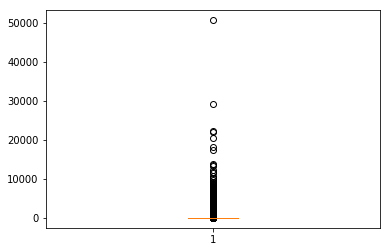

In [34]:
plt.boxplot(df2['RevolvingUtilizationOfUnsecuredLines'])
plt.show()

In [35]:
df2[df2.RevolvingUtilizationOfUnsecuredLines>1]
#Accoring to data dictionary :RevolvingUtilizationOfUnsecuredLines: utilization of unsecured loans, ideally should have a value less than 1.

,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Target
162,1.046279,47.0,Male,South,5416.0,Ownhouse,Self_Emp,PhD,1.0,1.104301,6.0,0.0,2.0,0.0,1,0
191,1.095083,53.0,Male,South,3500.0,Ownhouse,Self_Emp,Post-Grad,5.0,0.536704,7.0,1.0,1.0,2.0,0,1
226,1.953488,38.0,Male,South,3556.0,Ownhouse,Self_Emp,Post-Grad,0.0,0.153500,5.0,0.0,0.0,0.0,2,0
251,1.048211,58.0,Male,South,3500.0,Ownhouse,Self_Emp,Post-Grad,7.0,0.151957,12.0,0.0,0.0,0.0,0,0
293,2340.000000,45.0,Male,South,8333.0,Ownhouse,Self_Emp,Post-Grad,0.0,0.339333,7.0,0.0,2.0,0.0,2,1
319,1.002647,38.0,Male,South,3550.0,Ownhouse,Self_Emp,Post-Grad,2.0,0.472543,8.0,1.0,0.0,1.0,4,1
369,1.047496,35.0,Male,South,3871.0,Ownhouse,Self_Emp,PhD,2.0,0.314566,8.0,0.0,2.0,1.0,3,1
541,1.245847,24.0,Male,South,NaN,Ownhouse,Self_Emp,PhD,1.0,499.000000,4.0,1.0,0.0,0.0,NaN,1
649,1.011333,52.0,Male,South,400.0,Ownhouse,Self_Emp,PhD,0.0,10.800499,8.0,0.0,1.0,0.0,2,1
667,1.248751,33.0,Male,South,2700.0,Ownhouse,Self_Emp,PhD,0.0,0.175120,3.0,2.0,0.0,0.0,0,0


In [36]:
df2[df2.RevolvingUtilizationOfUnsecuredLines>2]

,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Target
293,2340.000000,45.0,Male,South,8333.0,Ownhouse,Self_Emp,Post-Grad,0.0,0.339333,7.0,0.0,2.0,0.0,2,1
697,2066.000000,58.0,Male,South,6000.0,Ownhouse,Self_Emp,PhD,0.0,0.271121,8.0,1.0,1.0,0.0,1,0
900,2.258964,33.0,Male,South,2000.0,Ownhouse,Self_Emp,PhD,2.0,0.032484,1.0,1.0,0.0,0.0,2,1
1991,1143.000000,44.0,Male,South,6500.0,Ownhouse,Self_Emp,PhD,2.0,0.547762,13.0,0.0,4.0,0.0,2,0
2331,6324.000000,59.0,Male,South,11318.0,Ownhouse,Self_Emp,PhD,0.0,0.136673,4.0,0.0,1.0,0.0,1,1
2428,2.837807,64.0,Female,South,11000.0,Ownhouse,Self_Emp,PhD,2.0,0.411417,8.0,0.0,2.0,0.0,2,1
2573,2.760956,65.0,Female,South,1681.0,Ownhouse,Self_Emp,PhD,0.0,0.470273,3.0,4.0,0.0,0.0,0,0
4278,1982.000000,33.0,Female,South,8000.0,Ownhouse,Self_Emp,Matric,0.0,0.144982,4.0,0.0,0.0,0.0,0,1
4793,3746.000000,52.0,Male,South,2600.0,Ownhouse,Self_Emp,Matric,2.0,0.481353,5.0,0.0,1.0,0.0,3,1
5956,2.237856,60.0,Male,South,1.0,Ownhouse,Self_Emp,Matric,6.0,2597.000000,16.0,1.0,2.0,1.0,4,1


In [37]:
#we have 371 rows for values greater than 2 and 3321 values greater than 1
#we can either delete or substitute or take all these values ,these seems to be an outlier 
# from research we found out : Example of individual utilization:
#I have a credit card with a $5,000 credit limit and a $1,000 balance. I divide $1,000 by $5,000 and get 0.2
# values should be less than 1, so very high values can be still be considered to be omitted 

In [38]:
#next feature age:
df2["age"].quantile(.99)

87.0

In [39]:
df2[df2.age>95]
#63 rows we can consider ignoring or delete 

,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Target
436,0.007000,97.0,Male,South,NaN,Ownhouse,Self_Emp,PhD,0.0,3.000000,2.0,0.0,0.0,0.0,NaN,1
2864,0.011449,96.0,Female,South,NaN,Ownhouse,Self_Emp,PhD,0.0,15.000000,3.0,0.0,0.0,0.0,0,1
2922,0.005043,99.0,Female,South,NaN,Ownhouse,Self_Emp,PhD,0.0,800.000000,5.0,0.0,0.0,0.0,NaN,1
7093,0.012950,96.0,Male,South,7500.0,Ownhouse,Self_Emp,Matric,0.0,0.003066,2.0,0.0,0.0,0.0,1,1
7319,0.126259,96.0,Male,South,8000.0,Ownhouse,Self_Emp,Matric,0.0,0.040495,9.0,0.0,0.0,0.0,0,1
7763,0.069167,101.0,Male,South,NaN,Ownhouse,Self_Emp,Matric,0.0,50.000000,2.0,0.0,0.0,0.0,0,1
9359,0.000000,97.0,Male,South,0.0,Ownhouse,Self_Emp,Matric,0.0,0.000000,3.0,0.0,0.0,0.0,0,1
9870,0.012737,98.0,Male,South,2152.0,Ownhouse,Self_Emp,Matric,0.0,0.006503,6.0,0.0,0.0,0.0,0,1
11854,0.000000,98.0,Female,North,NaN,Ownhouse,Self_Emp,Post-Grad,0.0,0.000000,2.0,0.0,0.0,0.0,NaN,1
12852,0.059038,97.0,Female,North,6000.0,Ownhouse,Officer1,Post-Grad,0.0,0.003333,3.0,0.0,0.0,0.0,1,1


In [40]:
df2[df2.age<18]
#since only one row have age 0 we can consider ignoring or drop

,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Target
88487,1.0,0.0,Male,Central,6000.0,Rented,Self_Emp,Graduate,1.0,0.436927,6.0,0.0,2.0,0.0,2,1


In [41]:
df2[df2["MonthlyIncome"].isnull()]["Occupation"].value_counts()

Self_Emp       12726
Non-officer     8063
Officer3        3236
Officer1        3106
Officer2        2600
Name: Occupation, dtype: int64

In [42]:
df2.groupby("Occupation").agg({"MonthlyIncome":np.mean})

,MonthlyIncome
Occupation,
Non-officer,6764.950076
Officer1,6602.209073
Officer2,6451.970558
Officer3,6791.097177
Self_Emp,6640.172718


In [43]:
#since all the mean value of each catogory is almost equal we can subtitute nulls values with the "MonthlyIncome" column mean
# So we can substitute with 6670.221237 value 

In [44]:
df2["Monthlyincome_new"]=df2["MonthlyIncome"].fillna(6670)
df2.head()

,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Target,Monthlyincome_new
0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,13.0,0.0,6.0,0.0,2,0,9120.0
1,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,4.0,0.0,0.0,0.0,1,1,2600.0
2,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,2.0,1.0,0.0,0.0,0,1,3042.0
3,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,5.0,0.0,0.0,0.0,0,1,3300.0
4,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,7.0,0.0,1.0,0.0,0,1,63588.0


In [45]:
df2.isnull().sum()

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           29731
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
Target                                      0
Monthlyincome_new                           0
dtype: int64

In [46]:
#since thee nulls are imputed values we can delete the old column with nulls 
df3=df2.drop(["MonthlyIncome"],axis=1)
df3.isnull().sum()

RevolvingUtilizationOfUnsecuredLines       0
age                                        0
Gender                                     0
Region                                     0
Rented_OwnHouse                            0
Occupation                                 0
Education                                  0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      3924
Target                                     0
Monthlyincome_new                          0
dtype: int64

In [47]:
df3["NumberOfTime30-59DaysPastDueNotWorse"].quantile(.99)

4.0

In [48]:
df3[df3["NumberOfTime30-59DaysPastDueNotWorse"]>5]

,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Target,Monthlyincome_new
251,1.048211,58.0,Male,South,Ownhouse,Self_Emp,Post-Grad,7.0,0.151957,12.0,0.0,0.0,0.0,0,0,3500.0
423,0.991502,61.0,Male,South,Ownhouse,Self_Emp,PhD,10.0,1.297901,11.0,2.0,3.0,5.0,1,0,3000.0
1052,0.232227,59.0,Male,South,Ownhouse,Self_Emp,PhD,6.0,6.094453,16.0,2.0,1.0,2.0,1,0,2000.0
1682,1.025987,63.0,Male,South,Ownhouse,Self_Emp,PhD,6.0,0.521442,8.0,2.0,2.0,1.0,1,1,3800.0
1733,1.000000,27.0,Male,South,Ownhouse,Self_Emp,PhD,98.0,0.000000,0.0,98.0,0.0,98.0,0,0,2700.0
2069,0.769765,37.0,Male,South,Ownhouse,Self_Emp,PhD,6.0,1.433628,8.0,2.0,1.0,1.0,1,0,3050.0
2286,1.000000,22.0,Male,South,Ownhouse,Self_Emp,PhD,98.0,0.000000,0.0,98.0,0.0,98.0,0,1,6670.0
2380,1.042754,59.0,Female,South,Ownhouse,Self_Emp,PhD,6.0,0.228472,7.0,4.0,2.0,0.0,0,1,14666.0
3173,0.597505,51.0,Female,South,Ownhouse,Self_Emp,PhD,6.0,0.057945,12.0,0.0,0.0,2.0,0,1,6091.0
3622,0.573024,56.0,Female,South,Ownhouse,Self_Emp,Matric,7.0,0.394758,14.0,0.0,1.0,0.0,0,0,4921.0


In [49]:
#value 98 can be an outliers, which is improbable bt not impossible , so we can ignore this outlier 
#next column : debt ratio  as given in data dictinary : Debt ratio: total debt/total assets; in most case should be less than 1.
df3["DebtRatio"].quantile(.99)

4979.040000000037

In [50]:
df3[df3.DebtRatio>1 ]

,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Target,Monthlyincome_new
6,0.305682,57.0,Female,South,Ownhouse,Self_Emp,PhD,0.0,5710.000000,8.0,0.0,3.0,0.0,0,1,6670.0
8,0.116951,27.0,Female,South,Ownhouse,Self_Emp,Post-Grad,0.0,46.000000,2.0,0.0,0.0,0.0,NaN,1,6670.0
14,0.019657,76.0,Female,South,Ownhouse,Self_Emp,Post-Grad,0.0,477.000000,6.0,0.0,1.0,0.0,0,1,0.0
16,0.061086,78.0,Female,South,Ownhouse,Self_Emp,Graduate,0.0,2058.000000,10.0,0.0,2.0,0.0,0,1,6670.0
25,0.392248,50.0,Female,South,Ownhouse,Self_Emp,PhD,0.0,1.595253,14.0,0.0,3.0,0.0,1,0,4676.0
32,0.083418,62.0,Male,South,Ownhouse,Self_Emp,Graduate,0.0,977.000000,6.0,0.0,1.0,0.0,0,1,6670.0
41,0.072898,81.0,Female,South,Ownhouse,Self_Emp,Graduate,0.0,75.000000,7.0,0.0,0.0,0.0,0,1,6670.0
44,0.368876,68.0,Female,South,Ownhouse,Self_Emp,Graduate,0.0,1687.500000,31.0,0.0,1.0,0.0,0,1,1.0
50,0.818978,73.0,Female,South,Ownhouse,Self_Emp,Graduate,0.0,3095.000000,9.0,0.0,1.0,1.0,0,1,0.0
58,0.541109,43.0,Female,South,Ownhouse,Self_Emp,Graduate,0.0,2477.000000,3.0,0.0,1.0,0.0,2,1,6670.0


In [51]:
df3[df3.DebtRatio>99 ]

,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Target,Monthlyincome_new
6,0.305682,57.0,Female,South,Ownhouse,Self_Emp,PhD,0.0,5710.00000,8.0,0.0,3.0,0.0,0,1,6670.0
14,0.019657,76.0,Female,South,Ownhouse,Self_Emp,Post-Grad,0.0,477.00000,6.0,0.0,1.0,0.0,0,1,0.0
16,0.061086,78.0,Female,South,Ownhouse,Self_Emp,Graduate,0.0,2058.00000,10.0,0.0,2.0,0.0,0,1,6670.0
32,0.083418,62.0,Male,South,Ownhouse,Self_Emp,Graduate,0.0,977.00000,6.0,0.0,1.0,0.0,0,1,6670.0
44,0.368876,68.0,Female,South,Ownhouse,Self_Emp,Graduate,0.0,1687.50000,31.0,0.0,1.0,0.0,0,1,1.0
50,0.818978,73.0,Female,South,Ownhouse,Self_Emp,Graduate,0.0,3095.00000,9.0,0.0,1.0,1.0,0,1,0.0
58,0.541109,43.0,Female,South,Ownhouse,Self_Emp,Graduate,0.0,2477.00000,3.0,0.0,1.0,0.0,2,1,6670.0
62,0.101156,72.0,Female,South,Ownhouse,Self_Emp,Graduate,0.0,1720.00000,12.0,0.0,2.0,0.0,0,1,6670.0
71,0.142013,67.0,Male,South,Ownhouse,Self_Emp,Graduate,0.0,1824.00000,7.0,0.0,2.0,0.0,0,1,6670.0
73,0.059669,31.0,Male,South,Ownhouse,Self_Emp,Graduate,0.0,3162.00000,11.0,0.0,2.0,0.0,1,1,0.0


In [52]:
#since there is almost 35000 records having values greater than 1, we need to check with buisness if its an error or not


In [53]:
df3["NumberOfOpenCreditLinesAndLoans"].quantile(.99)

24.0

In [54]:
df3[df3.NumberOfOpenCreditLinesAndLoans>25]
#NumberOfOpenCreditLinesAndLoans:cannot conclude if there is any error ,so we can include all values

,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Target,Monthlyincome_new
44,0.368876,68.0,Female,South,Ownhouse,Self_Emp,Graduate,0.0,1687.500000,31.0,0.0,1.0,0.0,0,1,1.0
111,0.318446,58.0,Male,South,Ownhouse,Self_Emp,PhD,0.0,1.382629,26.0,0.0,4.0,0.0,0,1,3833.0
246,0.084220,42.0,Male,South,Ownhouse,Self_Emp,Post-Grad,0.0,0.458551,26.0,0.0,2.0,0.0,4,1,6694.0
350,0.635721,68.0,Male,South,Ownhouse,Self_Emp,Post-Grad,1.0,0.218071,27.0,0.0,3.0,0.0,0,0,25000.0
373,0.082317,64.0,Male,South,Ownhouse,Self_Emp,PhD,0.0,0.214426,29.0,0.0,1.0,0.0,1,1,8636.0
388,0.250008,60.0,Male,South,Ownhouse,Self_Emp,PhD,0.0,2.086479,26.0,0.0,0.0,0.0,0,1,7550.0
445,0.008737,68.0,Male,South,Ownhouse,Self_Emp,PhD,0.0,0.209965,28.0,0.0,1.0,0.0,0,1,6000.0
618,0.732202,44.0,Male,South,Ownhouse,Self_Emp,PhD,0.0,0.258577,26.0,0.0,0.0,0.0,0,1,12912.0
733,0.312878,36.0,Male,South,Ownhouse,Self_Emp,PhD,0.0,0.230721,28.0,0.0,0.0,0.0,0,1,8000.0
874,0.231979,58.0,Male,South,Ownhouse,Self_Emp,PhD,0.0,0.373801,28.0,0.0,4.0,0.0,0,1,10633.0


In [55]:
df3["NumberOfTimes90DaysLate"].quantile(.99)

3.0

In [56]:
df3[df3.NumberOfTimes90DaysLate>3]
#NumberOfTimes90DaysLate:cannot conclude any value as error , so we can include the records

,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Target,Monthlyincome_new
1298,0.796279,44.0,Male,South,Ownhouse,Self_Emp,PhD,0.0,2518.000000,6.0,5.0,1.0,2.0,4,1,6670.0
1713,1.000000,52.0,Male,South,Ownhouse,Self_Emp,PhD,0.0,0.237812,2.0,4.0,0.0,1.0,1,0,6727.0
1733,1.000000,27.0,Male,South,Ownhouse,Self_Emp,PhD,98.0,0.000000,0.0,98.0,0.0,98.0,0,0,2700.0
1796,0.978808,47.0,Male,South,Ownhouse,Self_Emp,PhD,1.0,0.428419,5.0,4.0,0.0,0.0,1,0,3750.0
2286,1.000000,22.0,Male,South,Ownhouse,Self_Emp,PhD,98.0,0.000000,0.0,98.0,0.0,98.0,0,1,6670.0
2369,1.000000,45.0,Male,South,Ownhouse,Self_Emp,PhD,1.0,1.094979,3.0,4.0,0.0,0.0,1,1,4600.0
2380,1.042754,59.0,Female,South,Ownhouse,Self_Emp,PhD,6.0,0.228472,7.0,4.0,2.0,0.0,0,1,14666.0
2573,2.760956,65.0,Female,South,Ownhouse,Self_Emp,PhD,0.0,0.470273,3.0,4.0,0.0,0.0,0,0,1681.0
2766,0.995003,30.0,Female,South,Ownhouse,Self_Emp,PhD,1.0,0.176956,3.0,10.0,0.0,0.0,0,0,4000.0
2910,0.938586,44.0,Female,South,Ownhouse,Self_Emp,PhD,1.0,1095.000000,8.0,9.0,0.0,4.0,0,1,6670.0


In [57]:
df3["NumberRealEstateLoansOrLines"].quantile(.99)

4.0

In [58]:
df3[df3.NumberRealEstateLoansOrLines>4]
#NumberRealEstateLoansOrLines: not much info given in data discription to conclude if any records are errors

,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Target,Monthlyincome_new
0,0.766127,45.0,Male,South,Ownhouse,Self_Emp,Matric,2.0,0.802982,13.0,0.0,6.0,0.0,2,0,9120.0
205,0.021978,40.0,Male,South,Ownhouse,Self_Emp,Post-Grad,0.0,0.443756,12.0,0.0,5.0,0.0,2,1,10000.0
324,0.319779,32.0,Male,South,Ownhouse,Self_Emp,Post-Grad,0.0,1.247340,12.0,0.0,8.0,0.0,0,1,12500.0
351,0.000000,58.0,Male,South,Ownhouse,Self_Emp,Post-Grad,0.0,8380.000000,20.0,0.0,5.0,0.0,0,1,6670.0
496,0.138794,43.0,Male,South,Ownhouse,Self_Emp,PhD,0.0,0.384075,9.0,0.0,5.0,0.0,0,1,11666.0
594,0.002965,67.0,Male,South,Ownhouse,Self_Emp,PhD,0.0,0.349027,14.0,0.0,5.0,0.0,0,1,16800.0
604,0.008666,58.0,Male,South,Ownhouse,Self_Emp,PhD,0.0,1.908629,17.0,0.0,5.0,0.0,0,1,6500.0
643,0.143317,70.0,Male,South,Ownhouse,Self_Emp,PhD,3.0,4294.000000,16.0,0.0,5.0,1.0,0,1,6670.0
1342,0.047198,74.0,Male,South,Ownhouse,Self_Emp,PhD,0.0,0.375672,8.0,0.0,5.0,0.0,8,1,9305.0
1428,0.003812,50.0,Male,South,Ownhouse,Self_Emp,PhD,0.0,0.362584,27.0,0.0,5.0,0.0,1,1,24090.0


In [59]:
df3["NumberOfTime60-89DaysPastDueNotWorse"].quantile(.99)

2.0

In [60]:
df3[df3["NumberOfTime60-89DaysPastDueNotWorse"]>50]
#NumberOfTime60-89DaysPastDueNotWorse :not much info given in data discription to conclude if any records are errors

,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Target,Monthlyincome_new
1733,1.0,27.0,Male,South,Ownhouse,Self_Emp,PhD,98.0,0.000000,0.0,98.0,0.0,98.0,0,0,2700.0
2286,1.0,22.0,Male,South,Ownhouse,Self_Emp,PhD,98.0,0.000000,0.0,98.0,0.0,98.0,0,1,6670.0
3884,1.0,38.0,Female,South,Ownhouse,Self_Emp,Matric,98.0,12.000000,0.0,98.0,0.0,98.0,0,1,6670.0
4417,1.0,21.0,Female,South,Ownhouse,Self_Emp,Matric,98.0,0.000000,0.0,98.0,0.0,98.0,0,1,0.0
4705,1.0,21.0,Male,South,Ownhouse,Self_Emp,Matric,98.0,0.000000,0.0,98.0,0.0,98.0,0,1,2000.0
5073,1.0,33.0,Male,South,Ownhouse,Self_Emp,Matric,98.0,0.000000,0.0,98.0,0.0,98.0,0,1,1500.0
6280,1.0,51.0,Male,South,Ownhouse,Self_Emp,Matric,98.0,0.000000,0.0,98.0,0.0,98.0,0,0,7500.0
7032,1.0,29.0,Male,South,Ownhouse,Self_Emp,Matric,98.0,0.000000,0.0,98.0,0.0,98.0,0,0,1647.0
7117,1.0,25.0,Male,South,Ownhouse,Self_Emp,Matric,98.0,21.000000,0.0,98.0,0.0,98.0,NaN,0,6670.0
7687,1.0,21.0,Male,South,Ownhouse,Self_Emp,Matric,98.0,0.000000,0.0,98.0,0.0,98.0,0,0,6670.0


In [61]:
#df3["NumberOfDependents"].quantile(.99)
#we need to first convert it to float to do EDA
df3["NumberOfDependents"] = df3["NumberOfDependents"].astype(str).astype(float)
print(df3.dtypes)

RevolvingUtilizationOfUnsecuredLines    float64
age                                     float64
Gender                                   object
Region                                   object
Rented_OwnHouse                          object
Occupation                               object
Education                                object
NumberOfTime30-59DaysPastDueNotWorse    float64
DebtRatio                               float64
NumberOfOpenCreditLinesAndLoans         float64
NumberOfTimes90DaysLate                 float64
NumberRealEstateLoansOrLines            float64
NumberOfTime60-89DaysPastDueNotWorse    float64
NumberOfDependents                      float64
Target                                    int64
Monthlyincome_new                       float64
dtype: object


In [62]:
df3["NumberOfDependents"].isnull().sum()

3924

In [63]:
df3[df3["NumberOfDependents"].isnull()]
#no relation can be found between people havin number of dependents as null
#So we can either substitue it to 0 considering they ddont have dependants or we can delete those 3924 rows
#NumberOfDependents: So we can conclude better put as 0 for null value assuming the nulls were for no dependants (asumption)

,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Target,Monthlyincome_new
8,0.116951,27.0,Female,South,Ownhouse,Self_Emp,Post-Grad,0.0,46.0,2.0,0.0,0.0,0.0,NaN,1,6670.0
96,0.542243,48.0,Male,South,Ownhouse,Self_Emp,PhD,2.0,10.0,2.0,0.0,0.0,0.0,NaN,1,6670.0
109,0.041258,61.0,Male,South,Ownhouse,Self_Emp,PhD,0.0,4739.0,11.0,0.0,4.0,0.0,NaN,1,6670.0
159,0.000000,63.0,Male,South,Ownhouse,Self_Emp,PhD,0.0,2.0,4.0,0.0,0.0,0.0,NaN,1,6670.0
238,1.000000,28.0,Male,South,Ownhouse,Self_Emp,Post-Grad,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,6670.0
263,0.024671,78.0,Male,South,Ownhouse,Self_Emp,Post-Grad,0.0,392.0,6.0,0.0,1.0,0.0,NaN,1,6670.0
284,0.260971,57.0,Male,South,Ownhouse,Self_Emp,Post-Grad,0.0,5439.0,16.0,0.0,3.0,0.0,NaN,1,6670.0
381,1.000000,22.0,Male,South,Ownhouse,Self_Emp,PhD,0.0,130.0,0.0,0.0,0.0,0.0,NaN,1,6670.0
382,0.571605,66.0,Male,South,Ownhouse,Self_Emp,PhD,0.0,870.0,12.0,0.0,0.0,0.0,NaN,1,6670.0
412,0.000000,59.0,Male,South,Ownhouse,Self_Emp,PhD,0.0,2113.0,13.0,0.0,2.0,0.0,NaN,1,6670.0


In [64]:
df3["NumberOfDependents"]=df3["NumberOfDependents"].fillna(0)
df3.head(10)

,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Target,Monthlyincome_new
0,0.766127,45.0,Male,South,Ownhouse,Self_Emp,Matric,2.0,0.802982,13.0,0.0,6.0,0.0,2.0,0,9120.0
1,0.957151,40.0,Female,South,Ownhouse,Self_Emp,Graduate,0.0,0.121876,4.0,0.0,0.0,0.0,1.0,1,2600.0
2,0.658180,38.0,Female,South,Ownhouse,Self_Emp,PhD,1.0,0.085113,2.0,1.0,0.0,0.0,0.0,1,3042.0
3,0.233810,30.0,Female,South,Ownhouse,Self_Emp,Professional,0.0,0.036050,5.0,0.0,0.0,0.0,0.0,1,3300.0
4,0.907239,49.0,Male,South,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,7.0,0.0,1.0,0.0,0.0,1,63588.0
5,0.213179,74.0,Female,South,Ownhouse,Self_Emp,Graduate,0.0,0.375607,3.0,0.0,1.0,0.0,1.0,1,3500.0
6,0.305682,57.0,Female,South,Ownhouse,Self_Emp,PhD,0.0,5710.000000,8.0,0.0,3.0,0.0,0.0,1,6670.0
7,0.754464,39.0,Female,South,Ownhouse,Self_Emp,Post-Grad,0.0,0.209940,8.0,0.0,0.0,0.0,0.0,1,3500.0
8,0.116951,27.0,Female,South,Ownhouse,Self_Emp,Post-Grad,0.0,46.000000,2.0,0.0,0.0,0.0,0.0,1,6670.0
9,0.189169,57.0,Female,South,Ownhouse,Self_Emp,Graduate,0.0,0.606291,9.0,0.0,4.0,0.0,2.0,1,23684.0


In [65]:
df3.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
Gender                                  0
Region                                  0
Rented_OwnHouse                         0
Occupation                              0
Education                               0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
Target                                  0
Monthlyincome_new                       0
dtype: int64

In [66]:
df3["NumberOfDependents"].quantile(.99)

4.0

In [67]:
df3[df3.NumberOfDependents>9]
#NumberOfDependents:there is one value 20 which is an outlier can be deleted or ignored 

,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Target,Monthlyincome_new
6299,0.226616,40.0,Male,South,Ownhouse,Self_Emp,Matric,1.0,0.576539,11.0,2.0,1.0,0.0,20.0,1,6316.0
10618,0.000000,44.0,Female,South,Ownhouse,Self_Emp,Post-Grad,0.0,0.035590,5.0,0.0,0.0,0.0,10.0,1,12896.0
12982,0.325828,39.0,Female,North,Ownhouse,Self_Emp,Post-Grad,0.0,0.027100,6.0,0.0,0.0,0.0,10.0,1,4833.0
45599,0.139466,43.0,Female,East,Rented,Officer1,Post-Grad,1.0,3621.000000,9.0,0.0,1.0,0.0,10.0,1,0.0
61984,0.079194,60.0,Male,Central,Rented,Officer2,Professional,0.0,0.133582,10.0,0.0,0.0,0.0,10.0,1,7500.0
123911,0.017858,47.0,Female,East,Rented,Self_Emp,Post-Grad,1.0,0.368932,7.0,0.0,1.0,0.0,10.0,1,9166.0
128034,1.000000,53.0,Female,East,Rented,Officer3,Post-Grad,1.0,0.230054,3.0,1.0,1.0,0.0,13.0,1,3333.0


In [68]:
#conclusion from EDA
#catogorical variables like Gender', 'Region', 'Rented_OwnHouse', 'Occupation', 'Education' can be converted to dummies we have observed 
#RevolvingUtilizationOfUnsecuredLines:we have 371 rows for values greater than 2 and 3321 values greater than 1 ,we can either delete or substitute
#age:#since only one row have age 0 we can consider ignoring or drop, also 63 rows having values greater than 95 which is a possibility not impossiblevalues
#Monthlyincome:since all the mean value of each catogory is almost equal we can subtitute nulls values with the "MonthlyIncome" column mean
# So we can substitute with 6670.221237 value 
#NumberOfTime30-59DaysPastDueNotWorse:#value 98 can be an outliers, which is improbable bt not impossible , so we can ignore this outlier 
#DebtRatio:since there is almost 35000 records having values greater than 1, we need to check with buisness if its an error or not
#NumberOfOpenCreditLinesAndLoans:cannot conclude if there is any error ,so we can include all values
#NumberOfTimes90DaysLate:cannot conclude any value as error , so we can include the records
#NumberRealEstateLoansOrLines: not much info given in data discription to conclude if any records are errors
#NumberOfTime60-89DaysPastDueNotWorse :not much info given in data discription to conclude if any records are errors
#NumberOfDependents:there is one value 20 which is an outlier can be deleted or ignored 
#NumberOfDependents: So we can conclude better put as 0 for null value assuming the nulls were for no dependants

In [69]:
#since in data dictionary it is mentioned
#RevolvingUtilizationOfUnsecuredLines: utilization of unsecured loans, ideally should have a value less than 1.we need to remove the outliers
#Debt ratio: total debt/total assets; in most case should be less than 1. 
#since its said in most case it shud be less than 1, we can be on safe side and delete values greatred than 2

In [70]:
df4=df3.drop(df3[df3["RevolvingUtilizationOfUnsecuredLines"]>1].index)
df4.shape


(146679, 16)

In [71]:
df4.head()

,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Target,Monthlyincome_new
0,0.766127,45.0,Male,South,Ownhouse,Self_Emp,Matric,2.0,0.802982,13.0,0.0,6.0,0.0,2.0,0,9120.0
1,0.957151,40.0,Female,South,Ownhouse,Self_Emp,Graduate,0.0,0.121876,4.0,0.0,0.0,0.0,1.0,1,2600.0
2,0.658180,38.0,Female,South,Ownhouse,Self_Emp,PhD,1.0,0.085113,2.0,1.0,0.0,0.0,0.0,1,3042.0
3,0.233810,30.0,Female,South,Ownhouse,Self_Emp,Professional,0.0,0.036050,5.0,0.0,0.0,0.0,0.0,1,3300.0
4,0.907239,49.0,Male,South,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,7.0,0.0,1.0,0.0,0.0,1,63588.0


In [72]:
df5=df4.drop(df4[df4["DebtRatio"]>2].index)
df5.shape

(116240, 16)

In [73]:
df6=df5.drop(df5[df5["age"]<18].index)
df6.shape

(116239, 16)

In [105]:
df6["Target"].value_counts()

1    108975
0      7264
Name: Target, dtype: int64

In [74]:
#Our data is ready for feature engineering 
#lets do one hot encooding on catogorical variable 
df7=pd.get_dummies(df6)
df7.head()
df7.columns.tolist()

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'Target',
 'Monthlyincome_new',
 'Gender_Female',
 'Gender_Male',
 'Region_Central',
 'Region_East',
 'Region_North',
 'Region_South',
 'Region_West',
 'Rented_OwnHouse_Ownhouse',
 'Rented_OwnHouse_Rented',
 'Occupation_Non-officer',
 'Occupation_Officer1',
 'Occupation_Officer2',
 'Occupation_Officer3',
 'Occupation_Self_Emp',
 'Education_Graduate',
 'Education_Matric',
 'Education_PhD',
 'Education_Post-Grad',
 'Education_Professional']

In [75]:
#lets delete one row froom each catogory to avoid dummy trap
df8=df7.drop(["Gender_Male","Region_West","Rented_OwnHouse_Rented","Occupation_Self_Emp","Education_Professional"],axis=1)
df8.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Target,...,Region_South,Rented_OwnHouse_Ownhouse,Occupation_Non-officer,Occupation_Officer1,Occupation_Officer2,Occupation_Officer3,Education_Graduate,Education_Matric,Education_PhD,Education_Post-Grad
0,0.766127,45.0,2.0,0.802982,13.0,0.0,6.0,0.0,2.0,0,...,1,1,0,0,0,0,0,1,0,0
1,0.957151,40.0,0.0,0.121876,4.0,0.0,0.0,0.0,1.0,1,...,1,1,0,0,0,0,1,0,0,0
2,0.658180,38.0,1.0,0.085113,2.0,1.0,0.0,0.0,0.0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.233810,30.0,0.0,0.036050,5.0,0.0,0.0,0.0,0.0,1,...,1,1,0,0,0,0,0,0,0,0
4,0.907239,49.0,1.0,0.024926,7.0,0.0,1.0,0.0,0.0,1,...,1,1,0,0,0,0,0,0,0,1


In [76]:
print(df7.shape)
print(df8.shape)

(116239, 30)
(116239, 25)


In [77]:
#lets check about the imbalance of data
df8["Target"].value_counts(dropna=False)

1    108975
0      7264
Name: Target, dtype: int64

In [78]:
#we can try build the model frst without altering the data
#tthen we can solve the imbalance and check the accuracy parameters how it has changed 
#frst lets get the data ready for Model 
X=df8.drop("Target",axis=1)
Y=df8["Target"]
print(X.shape)
print(Y.shape)

(116239, 24)
(116239,)


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=6551)

In [81]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(92991, 24)
(23248, 24)
(92991,)
(23248,)


In [82]:
#first method using sklearn

from sklearn.linear_model import LogisticRegression 
lgr=LogisticRegression(random_state=0)

In [83]:
Model=lgr.fit(X_train,Y_train)

C:\Users\SHIBU\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [84]:
Model.coef_

array([[-8.97824344e-01,  4.07451125e-02, -6.33595479e-01,
        -1.57741625e-01,  1.89787952e-02, -1.37485688e-01,
        -3.35599232e-01,  6.97433984e-01, -1.92636814e-01,
         1.20481176e-04,  1.97084609e-01,  1.25421772e+00,
         3.40004460e-01, -3.33272473e-02,  9.31199578e-02,
         2.62447012e-01,  1.30707086e-01,  6.35108385e-02,
         7.88404395e-03,  5.46091351e-02,  2.81624173e-01,
        -3.84284389e-01, -1.26698352e-01,  1.21043496e-01]])

In [85]:
Model.intercept_

array([0.41697766])

In [86]:
Y_preds=Model.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
accuracy_score(Y_test,Y_preds)

0.9385323468685478

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
lass = Lasso()
elsast = ElasticNet()
import warnings
warnings.filterwarnings("ignore")

In [90]:
param_grid = {"penalty": ["l1", "l2"] ,
                          "C":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,50,25,100,120] } 

In [91]:
gr = GridSearchCV(Model, param_grid=param_grid, scoring = 'r2', cv =3)
gr.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 50, 25, 100, 120],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [92]:
gr.best_estimator_

LogisticRegression(C=7, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
gr.best_score_

-0.047291380678470864

In [ ]:
#Tried gridsearchcv to optimize the model , but not a good result need to look into i further 

In [94]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
metrics.roc_curve(Y_test,Model.predict_proba(X_test)[:,1])

(array([0.00000000e+00, 0.00000000e+00, 6.96864111e-04, ...,
        9.98606272e-01, 9.98606272e-01, 1.00000000e+00]),
 array([0.00000000e+00, 2.29221107e-04, 2.29221107e-04, ...,
        9.99954156e-01, 1.00000000e+00, 1.00000000e+00]),
 array([2.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.69604269e-03, 1.53000175e-03, 1.18894531e-03]))

In [96]:
fpr,tpr,thresholds=metrics.roc_curve(Y_test,Model.predict_proba(X_test)[:,1])

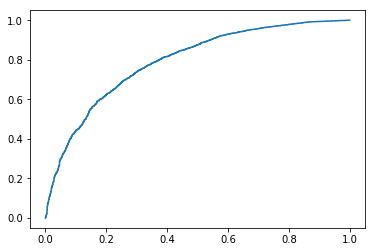

In [97]:
plt.plot(fpr,tpr,"-")

In [98]:
metrics.roc_auc_score(Y_test,Model.predict_proba(X_test)[:,1])

0.7917347501274293

In [99]:
metrics.confusion_matrix(Y_test,Model.predict(X_test))

array([[  125,  1310],
       [  119, 21694]], dtype=int64)

In [100]:
print(metrics.classification_report(Y_test,Model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.51      0.09      0.15      1435
           1       0.94      0.99      0.97     21813

    accuracy                           0.94     23248
   macro avg       0.73      0.54      0.56     23248
weighted avg       0.92      0.94      0.92     23248



In [101]:
#second method using stats model
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [102]:
df6.columns
#'Gender', 'Region', 'Rented_OwnHouse', 'Occupation', 'Education',

Index(['RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender', 'Region',
       'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Target', 'Monthlyincome_new'],
      dtype='object')

In [103]:
## Split the data into test and train
data_train=df6.sample(frac=0.80,random_state=6551)
data_test=df6.drop(data_train.index)

In [106]:
#cudint use 'NumberOfTime30-59DaysPastDueNotWorse' and 'NumberOfTime60-89DaysPastDueNotWorse' due to "-"used in name so had to omit it in further analysis

model1=smf.glm("Target~RevolvingUtilizationOfUnsecuredLines+age+C(Gender)+C(Region)+C(Rented_OwnHouse)+C(Occupation)+C(Education)+DebtRatio+NumberOfOpenCreditLinesAndLoans+NumberOfTimes90DaysLate+NumberRealEstateLoansOrLines+NumberOfDependents+Monthlyincome_new",data=data_train,family=sm.families.Binomial()).fit()

In [107]:
print(model1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Target   No. Observations:                92991
Model:                            GLM   Df Residuals:                    92968
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 09 May 2020   Deviance:                          nan
Time:                        11:00:58   Pearson chi2:                 1.05e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [108]:
## Let's check confusion matrix and AUC
import sklearn.metrics as metrics

In [109]:
y_true=data_test['Target']
y_pred=model1.predict(data_test)

In [110]:
y_pred.head()

3     0.984513
9     0.989039
22    0.922919
24    0.992363
33    0.993278
dtype: float64

In [111]:
data_test

,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Target,Monthlyincome_new
3,0.233810,30.0,Female,South,Ownhouse,Self_Emp,Professional,0.0,0.036050,5.0,0.0,0.0,0.0,0.0,1,3300.0
9,0.189169,57.0,Female,South,Ownhouse,Self_Emp,Graduate,0.0,0.606291,9.0,0.0,4.0,0.0,2.0,1,23684.0
22,1.000000,39.0,Female,South,Ownhouse,Self_Emp,Graduate,0.0,0.241104,4.0,0.0,0.0,0.0,0.0,1,2500.0
24,0.046560,58.0,Female,South,Ownhouse,Self_Emp,Graduate,0.0,0.241622,9.0,0.0,1.0,0.0,0.0,1,2416.0
33,0.186869,57.0,Male,South,Ownhouse,Self_Emp,Graduate,0.0,0.313812,9.0,0.0,2.0,0.0,0.0,1,7000.0
38,0.363636,26.0,Female,South,Ownhouse,Self_Emp,Graduate,0.0,0.009990,1.0,0.0,0.0,0.0,0.0,1,1000.0
43,0.718705,28.0,Male,South,Ownhouse,Self_Emp,Graduate,0.0,0.170126,4.0,0.0,0.0,0.0,1.0,1,3661.0
48,0.834048,38.0,Male,South,Ownhouse,Self_Emp,Graduate,0.0,0.393662,13.0,0.0,2.0,0.0,2.0,1,13000.0
52,1.000000,62.0,Female,South,Ownhouse,Self_Emp,Graduate,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1,6670.0
54,0.992016,29.0,Female,South,Ownhouse,Self_Emp,Graduate,0.0,0.008065,1.0,0.0,0.0,0.0,0.0,1,2231.0


In [112]:
y_true=data_test['Target']
y_pred=model1.predict(data_test).map(lambda x:1 if x>0.5 else 0)
metrics.confusion_matrix(y_true,y_pred)

array([[  200,  1232],
       [   79, 21737]], dtype=int64)

In [113]:
## ROC curve
y_score=model1.predict(data_test)
fpr,tpr,thresholds=metrics.roc_curve(y_true,y_score)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)

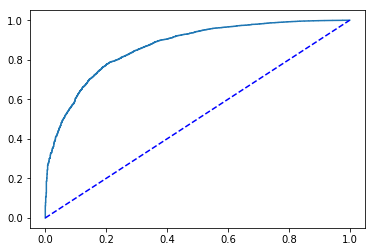

In [114]:
plt.plot(fpr,tpr,"-")
plt.plot(x,y,'b--')

In [115]:
## AUC
metrics.roc_auc_score(y_true,y_score)

0.86700797349288

In [116]:
#need to check for assumptions and validate 
#mulitcollliniarity and try reducing by VIF

df6.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender', 'Region',
       'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Target', 'Monthlyincome_new'],
      dtype='object')

In [118]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [121]:
#gather features
#features = "+".join(df6.columns - ["Target"])

# get y and X dataframes based on this regression:
y, X = dmatrices("Target~RevolvingUtilizationOfUnsecuredLines+age+C(Gender)+C(Region)+C(Rented_OwnHouse)+C(Occupation)+C(Education)+DebtRatio+NumberOfOpenCreditLinesAndLoans+NumberOfTimes90DaysLate+NumberRealEstateLoansOrLines+NumberOfDependents+Monthlyincome_new", df6, return_type='dataframe')

In [122]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [123]:
vif.round(1)

,VIF Factor,features
0,30.9,Intercept
1,1.5,C(Gender)[T.Male]
2,1.9,C(Region)[T.East]
3,2.0,C(Region)[T.North]
4,2.2,C(Region)[T.South]
5,1.4,C(Region)[T.West]
6,1.3,C(Rented_OwnHouse)[T.Rented]
7,2.0,C(Occupation)[T.Officer1]
8,1.5,C(Occupation)[T.Officer2]
9,2.0,C(Occupation)[T.Officer3]


In [ ]:
#as none of the VIF values for a feature is above 5 ,we cannot omit any feature proving there is not high multicolliniarity